In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import  jieba.analyse
import os

%matplotlib inline

In [2]:
file_path = './data/wordcloud'
seq = os.sep

In [3]:
os.listdir(file_path)

['black_mask.png',
 'color_mask.png',
 'constitution.txt',
 'Hiragino.ttf',
 'result',
 'xyj.txt']

In [4]:
if not os.path.exists(file_path + seq + 'result'):
    os.mkdir(file_path + seq + 'result')
outdir = file_path + seq + 'result'

In [12]:
with open(file_path + seq + 'xyj.txt', encoding='utf-8') as f:
    content = f.read()
    # 这个地方只是试试分批量读写，小文件用不着
#     while True:
#         content = f.read(2048)
#         if len(content) == 0:
#             break
        # newFile.write(content)

# using TF-IDF algorithm
text_and_freq = jieba.analyse.extract_tags(content, topK=150, withWeight=True)
del content
print(text_and_freq[:20])

[('行者', 0.13267341927209544), ('八戒', 0.060546395279482794), ('师父', 0.05548843627643268), ('三藏', 0.048811486167008554), ('大圣', 0.03393315095807803), ('唐僧', 0.030492017542300978), ('沙僧', 0.02823962220676245), ('菩萨', 0.027923454463281632), ('妖精', 0.025040731343187208), ('和尚', 0.022241694784788886), ('那怪', 0.020501984570305918), ('甚么', 0.020410524385245366), ('那里', 0.019449583572240244), ('长老', 0.01893667785007551), ('呆子', 0.01772063096051131), ('怎么', 0.01680863539511296), ('徒弟', 0.01659001462734297), ('不知', 0.016569092446185065), ('老孙', 0.01598471705865597), ('悟空', 0.01594339861261426)]


In [13]:
text_and_freq = {i[0]: i[1] for i in text_and_freq}

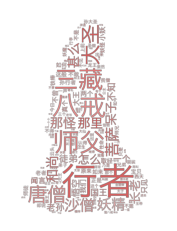

In [17]:
mask = np.array(Image.open(file_path + seq + 'color_mask.png'))

import random
# 颜色函数
def random_color(word, font_size, position, orientation, font_path, random_state):
    s = 'hsl(0, %d%%, %d%%)' % (random.randint(60, 80), random.randint(60, 80))
    return s


wc = WordCloud(mask=mask,
               font_path=file_path + seq + 'Hiragino.ttf',
               mode='RGBA',
               background_color=None,
               color_func=random_color).generate_from_frequencies(text_and_freq)

# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 保存到文件
wc.to_file(outdir + seq + 'wordcloud.png')

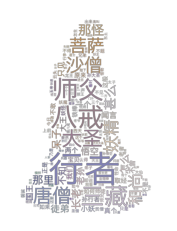

In [19]:
from wordcloud import ImageColorGenerator

wc = WordCloud(mask=mask,
               font_path=file_path + seq + 'Hiragino.ttf',
               mode='RGBA',
               background_color=None,
               color_func=random_color).generate_from_frequencies(text_and_freq)

# 从图片中生成颜色
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 保存到文件
wc.to_file(outdir + seq + 'wordcloud_2.png')

### Csv文件读取

In [ ]:
import pandas as pd

# pandas读取数据
df = pd.read_csv("./wordcloud/entertainment_news.csv", encoding='utf-8').dropna()
# 转成list
content = df["content"].values.tolist()

# 分词与统计词频
segment = []
for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg) > 1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

In [ ]:
# 去停用词
words_df = pd.DataFrame({'segment': segment})
stopwords = pd.read_csv("data/stopwords.txt",
                        index_col=False,
                        quoting=3,
                        sep="\t",
                        names=['stopword'],
                        encoding='utf-8')  # quoting=3 全不引用
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]

In [ ]:
# 统计排序
words_stat = words_df.groupby(by=['segment'])['segment'].agg(
    {"计数": numpy.size})

words_stat = words_stat.reset_index().sort_values(by=["计数"], ascending=False)
# words_stat.head()

In [ ]:
# 词频
word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}  # 返回字典